In [2]:
from ultralytics import YOLO
import cv2
import numpy as np
import re

# Load the trained model
model = YOLO("models/read_plate.pt")

# Define the image path
image_path = "plate_0.jpg"  # Replace with your image path

# Load image using OpenCV
image = cv2.imread(image_path)

# Run inference
results = model(image)

# List to store detected characters and their positions
detected_chars = []

# Extract detected text and their bounding box coordinates
for result in results:
    for box in result.boxes:
        if hasattr(box, 'cls') and hasattr(box, 'xyxy'):
            char = result.names[int(box.cls[0])]  # Get detected character
            x_min = box.xyxy[0][0].item()  # Get X-coordinate of bounding box (leftmost point)
            detected_chars.append((x_min, char))  # Store X position and character

# Sort detected characters by X position (left to right)
detected_chars.sort(key=lambda x: x[0])

# Concatenate sorted characters
raw_plate = "".join([char for _, char in detected_chars])

# Function to correct and reorder the license plate
def format_license_plate(raw_text):
    # Convert common OCR mistakes
    replacements = {
        "00": "O",  
        "01": "1",
        "03": "3",
        "05": "5",
        "02": "2",
        "06": "6",
        "04": "4",
        "07": "7",
        "08": "8",
        "09": "9"
    }
    for key, value in replacements.items():
        raw_text = raw_text.replace(key, value)
    
    # Extract numbers and letters separately
    numbers = "".join(re.findall(r'\d', raw_text))  # Extract digits
    letters = "".join(re.findall(r'[A-Z]', raw_text))  # Extract uppercase letters

    # Merge back in the correct order
    return letters+numbers  # Assuming the plate starts with numbers, then letters

# Apply formatting
final_plate = format_license_plate(raw_plate)

# Print the final detected license plate
print("Detected License Plate:", final_plate)

# Display results
result_img = results[0].plot()  # Get processed image

cv2.imshow("Detected Image", result_img)  # Show image with detections
cv2.waitKey(0)
cv2.destroyAllWindows()



0: 224x640 1 05, 1 06, 1 08, 2 As, 1 F, 1 K, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Detected License Plate: AAFK865


## Detected correctly from the plate:
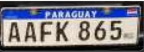